<a href="https://colab.research.google.com/github/jpdeleon/chronos/blob/master/notebooks/examples-QLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#!pip install git+https://github.com/jpdeleon/chronos.git@master

## QLP module

In [5]:
import chronos as cr

In [6]:
qlp = cr.QLP(toiid=1497, sector=24)

Target: TOI 1497
Available sectors: [16 17 24]
Using sector=16.
Querying Gaia DR2 catalog for ra,dec=(343.233 59.851) within 3.0 arcsec.
Filename: /home/jp/.astropy/cache/download/py3/4051d254ea34859e8458cb53df60b169
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      29   ()      
  1  LIGHTCURVE    1 BinTableHDU     65   1226R x 13C   [D, J, E, E, E, J, J, E, E, E, E, E, E]   
None
Using QLP KSPSAP (rad=best) lightcurve.


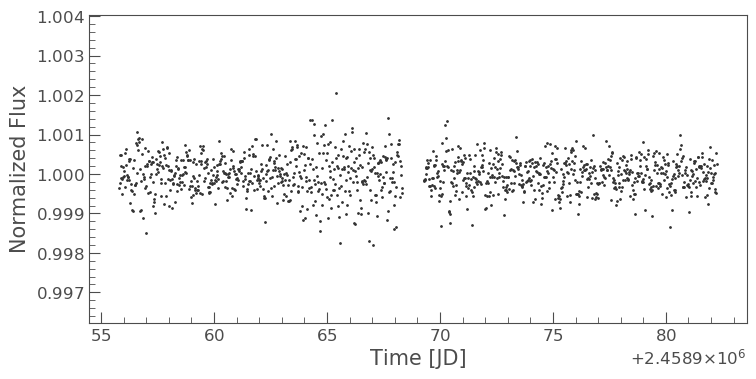

In [7]:
lc = qlp.lc.remove_outliers()
ax = lc.scatter()

## Under the hood

In [7]:
t = cr.LongCadence(toiid=1497, sector=17)

Target: TOI 1497
Using lightcurve with custom aperture.
Searching targetpixelfile for ra,dec=(343.233 59.851) using Tesscut
Removing scattered light + applying PLD
Querying Gaia DR2 catalog for ra,dec=(343.233 59.851) within 120.0 arcsec.
Using TESS long cadence.



In [8]:
from astropy.io import fits

ext = 'fits'
sec = str(t.sector).zfill(4)
tic = str(t.ticid).zfill(16)
base = "https://archive.stsci.edu/hlsps/qlp/"
url = base+f"s{sec}/{tic[:4]}/{tic[4:8]}/{tic[8:12]}/{tic[12:16]}/hlsp_qlp_tess_ffi_s{sec}-{tic}_tess_v01_llc.{ext}"
print(url)

https://archive.stsci.edu/hlsps/qlp/s0017/0000/0003/7167/3488/hlsp_qlp_tess_ffi_s0017-0000000371673488_tess_v01_llc.fits


In [9]:
hdulist = fits.open(url)
hdulist.info()

Filename: /home/jp/.astropy/cache/download/py3/ff0dc6cf5f9c61b5d99cb18b513b632b
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      29   ()      
  1  LIGHTCURVE    1 BinTableHDU     65   1130R x 13C   [D, J, E, E, E, J, J, E, E, E, E, E, E]   


In [11]:
hdulist[1].data._coldefs

['TIME',
 'CADENCENO',
 'SAP_FLUX',
 'KSPSAP_FLUX',
 'KSPSAP_FLUX_ERR',
 'QUALITY',
 'ORBITID',
 'SAP_X',
 'SAP_Y',
 'SAP_BKG',
 'SAP_BKG_ERR',
 'KSPSAP_FLUX_SML',
 'KSPSAP_FLUX_LAG']

In [12]:
hdulist[1].header[:10]

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   56 / length of dimension 1                          
NAXIS2  =                 1130 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   13 / number of table fields                         
TTYPE1  = 'TIME    '                                                            
TFORM1  = 'D       '                                                            

## multiple TIC at a time

In [ ]:
from astroquery.mast import Observations

tic_ids = ['21278334', '7583207']
obsTable = Observations.query_criteria(provenance_name="QLP",
                               target_name=tic_ids,
                               sequence_number=26)

data = Observations.get_product_list(obsTable)

download_lc = Observations.download_products(data)

In [ ]:
d = fits.open(download_lc[0]['Local Path'])
d.info()